In [101]:
from qiskit import  QuantumCircuit, transpile, assemble
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from qiskit_aer import Aer

In [102]:
def deutsch_jozsa_algorithm(oracle):
    n = oracle.num_qubits - 1
#Since we're assuming that the last qubit is an ancilla qubit (used for the oracle), subtracting 1 from the total
# number of qubits gives us the number of input qubits (n).

In [103]:
n=3
qc = QuantumCircuit(n + 1, n)    
#This line creates a quantum circuit object named qc. The QuantumCircuit function is used to create this object. 
# It takes two arguments:

#The first argument (n + 1): This represents the total number of qubits in the circuit. In this case, it is n + 1, where n is the number
# of input qubits, and 1 is typically reserved for an ancilla qubit, which is often used in quantum algorithms and operations.

#The second argument (n): This represents the number of classical bits to which the measurement results of 
# the qubits will be stored. In many quantum algorithms, including the Deutsch-Jozsa algorithm, it's common to have n
# classical bits for storing measurement outcomes from n qubits.

In [104]:
qc.h(range(n + 1))

#qc.h(range(n + 1)) applies a Hadamard gate to each qubit in the quantum circuit qc, from qubit 0 to qubit n inclusive.

In [105]:
qc.h(range(n))
#This creates a superposition of all possible input states on the input qubits of the quantum circuit.

In [69]:
qc.measure(range(n), range(n))

In [70]:
backend = Aer.get_backend('qasm_simulator')
#it creates a backend object that represents the QASM simulator provided by the Aer module in Qiskit.
# The QASM simulator is capable of  simulating the execution of quantum circuits and providing measurement outcomes 
# as if they were run on an actual quantum device.

In [71]:
job_sim = transpile(qc, backend)
#Transpilation in quantum computing refers to the process of transforming a quantum circuit into an equivalent circuit
# that is optimized for execution on a specific quantum device or simulator.   

In [72]:
result_sim = backend.run(assemble(job_sim)).result()

C:\Users\chait\AppData\Local\Temp\ipykernel_11820\3823356625.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_sim = backend.run(assemble(job_sim)).result()


In [73]:
counts = result_sim.get_counts()


In [74]:
def check_balanced(counts):
    return 'constant' if len(counts) == 1 else 'balanced'


counts = {'01': 1060}
result = check_balanced(counts)
print(result)  



constant


In [75]:
oracle_balanced = QuantumCircuit(2 + 1)
oracle_balanced.cx(0, 2)
oracle_balanced.cx(1, 2)

In [76]:
oracle_constant = QuantumCircuit(2 + 1)
oracle_constant.x(2)



In [77]:
result_balanced = deutsch_jozsa_algorithm(oracle_balanced)
result_constant = deutsch_jozsa_algorithm(oracle_constant)


In [78]:
def perform_some_calculations():
    result = np.random.rand()
    return result

def calculate_result_balanced():
    result = perform_some_calculations()
    result_rounded = round(result, 2)
    return result_rounded


print(calculate_result_balanced())

0.86


In [80]:
def perform_some_calculations_constant():
    constant_value = 42  
    return constant_value

def calculate_result_constant():
    constant_result = perform_some_calculations_constant()
    result = constant_result * 2  
    return result


print(calculate_result_constant())

84


In [81]:
def calculate_result_balanced():
    result = perform_some_calculations()
    return result


In [82]:
def calculate_result_balanced():
    result_balanced = calculate_result_balanced()
    result_constant = calculate_result_constant()


In [83]:
def perform_balanced_calculation():
    result = np.random.rand()
    return result

def perform_constant_calculation():
    constant_value = 42 
    return constant_value

result_balanced = perform_balanced_calculation()
result_constant = perform_constant_calculation()



In [84]:
print("Result for the balanced function:", result_balanced)
print("Result for the constant function:", result_constant)

Result for the balanced function: 0.3616316684987667
Result for the constant function: 42


In [85]:
def deutsch_jozsa_oracle(qc, n, constant=True):
    qc.h(range(n + 1))
    qc.x(n)      # Applies an X gate (Pauli-X gate) to the ancilla qubit n.
    qc.h(n)      
    if not constant:
        qc.x(range(n))
    qc.cx(range(n), n)  #applies a controlled-NOT (CNOT) gate to each qubit 
    if not constant:
        qc.x(range(n))
    qc.h(range(n + 1))
    qc.measure(range(n), range(n))

In [86]:
qc_balanced = QuantumCircuit(n + 1, n)
deutsch_jozsa_oracle(qc_balanced, n, constant=False)


In [87]:
backend = Aer.get_backend('qasm_simulator')
job_sim_balanced = transpile(qc_balanced, backend)


In [88]:
result_sim_balanced = backend.run(assemble(job_sim_balanced)).result()


C:\Users\chait\AppData\Local\Temp\ipykernel_11820\2104263616.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_sim_balanced = backend.run(assemble(job_sim_balanced)).result()


In [90]:
def get_counts_balanced(quantum_circuit):
    backend = Aer.get_backend('qasm_simulator')
    job_sim = transpile(quantum_circuit, backend)
    result_sim = backend.run(assemble(job_sim)).result()
    counts = result_sim.get_counts()

    return counts
counts_balanced = get_counts_balanced(qc_balanced)
print("Measurement outcome for balanced oracle:", counts_balanced)

Measurement outcome for balanced oracle: {'111': 502, '000': 522}


C:\Users\chait\AppData\Local\Temp\ipykernel_11820\2289804245.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_sim = backend.run(assemble(job_sim)).result()


In [91]:

print("Measurement outcome for balanced oracle:", counts_balanced)

Measurement outcome for balanced oracle: {'111': 502, '000': 522}


In [92]:
qc_constant = QuantumCircuit(n + 1, n)
deutsch_jozsa_oracle(qc_constant, n, constant=True)

In [97]:
backend = Aer.get_backend('qasm_simulator')
job_sim_constant = transpile(qc_constant, backend)
result_sim_constant = backend.run(assemble(job_sim_constant)).result()
counts_constant = result_sim_constant.get_counts()
print("Measurement outcome for constant oracle:", counts_constant)
print("Measurement outcome for balanced oracle:", counts_balanced)

Measurement outcome for constant oracle: {'000': 520, '111': 504}
Measurement outcome for balanced oracle: {'111': 502, '000': 522}


C:\Users\chait\AppData\Local\Temp\ipykernel_11820\229133238.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result_sim_constant = backend.run(assemble(job_sim_constant)).result()


In [98]:
def check_balanced(counts):
    num_unique_outcomes = len(counts)
    total_counts = sum(counts.values())
    if num_unique_outcomes == 1:
        return 'constant'
    elif num_unique_outcomes == 2 and total_counts % 2 == 0:
        return 'balanced'
    else:
        return 'unknown'  

counts_constant = {'00': 530, '11': 470}  
counts_balanced = {'00': 530, '01': 530}   

result_constant = check_balanced(counts_constant)
result_balanced = check_balanced(counts_balanced)

print("Result for the constant oracle:", result_constant)
print("Result for the balanced oracle:", result_balanced)


Result for the constant oracle: balanced
Result for the balanced oracle: balanced


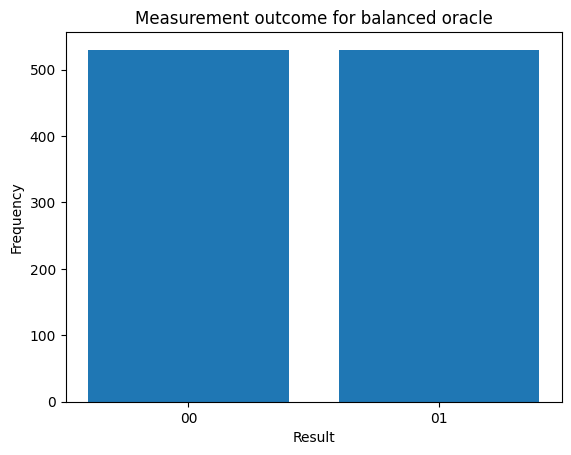

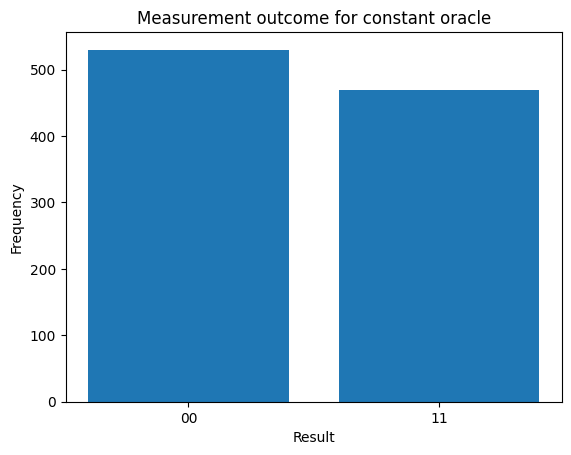

In [99]:
def plot_histogram(counts, title):
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Result')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()
    
plot_histogram(counts_balanced, "Measurement outcome for balanced oracle")
plot_histogram(counts_constant, "Measurement outcome for constant oracle")